# <font color = salmon> Multiple Agents - Single Function (ie Tool))

## <font color = grey> Replicating Current GOLD  (static nginx, flask, wsgi, gunicorn, streamlit )
#### <font color = grey> Conda Env: <font color = pink> Restablishing baseline --> <font color = red> all content at 14.Flask_Streaming

---
2005-11-08 18:50:00

2005-12-01 16:50:00

2005-1-01 16:50:00
___

___
#### <font color = red> Key Admin Tasks

sudo systemctl daemon-reload

sudo systemctl restart flaskapp

sudo systemctl restart nginx

sudo journalctl -u flaskapp -f

sudo tail -f /var/log/nginx/error.log

sudo systemctl status flaskapp

sudo systemctl status nginx

<font color = tomato>sudo vi /etc/systemd/system/flaskapp.service

<font color = tomato>sudo vi /etc/nginx/sites-available/flaskapp

____

**OPTIONAL**

sudo systemctl start flaskapp

sudo systemctl enable flaskapp

sudo systemctl start nginx

sudo systemctl enable nginx

---
# <font color = tomato> Checks for GOLD Solution


___
### <font color = grey> Step 1. Note the module in wsgi
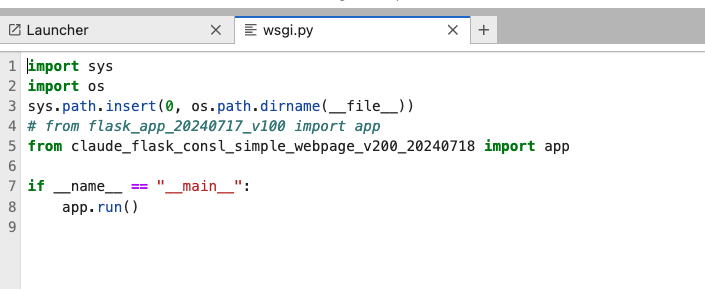

___
### <font color = grey> Step 2. Scan directory for mail app file & review contents

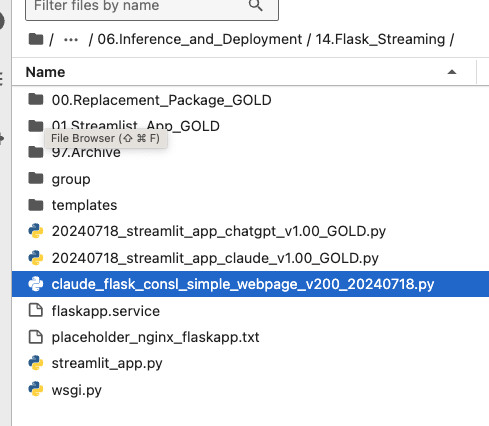
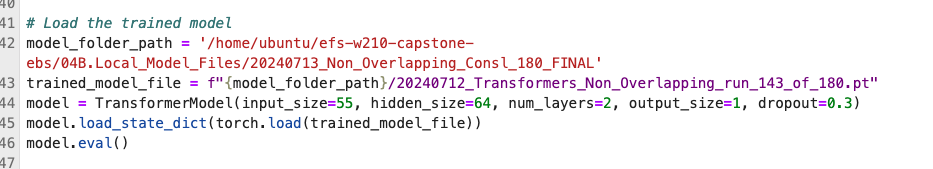

___
### <font color = grey> Step 3. Check templates folder for 2 files - Scan contents

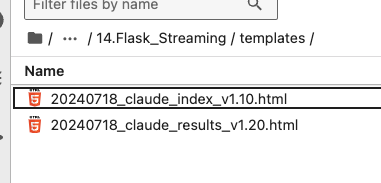
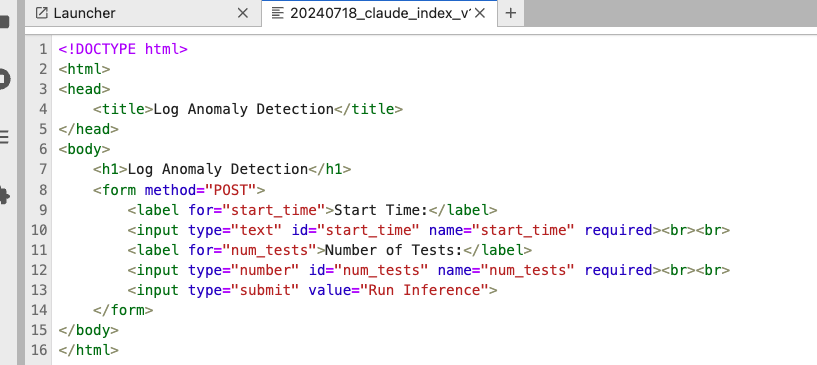
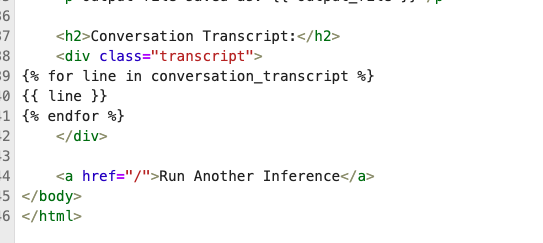

---
### <font color = grey> Step 4. Run commands to start gunicorn/flask and nginx

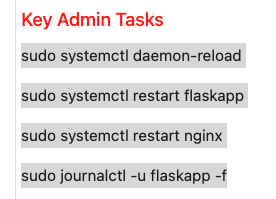

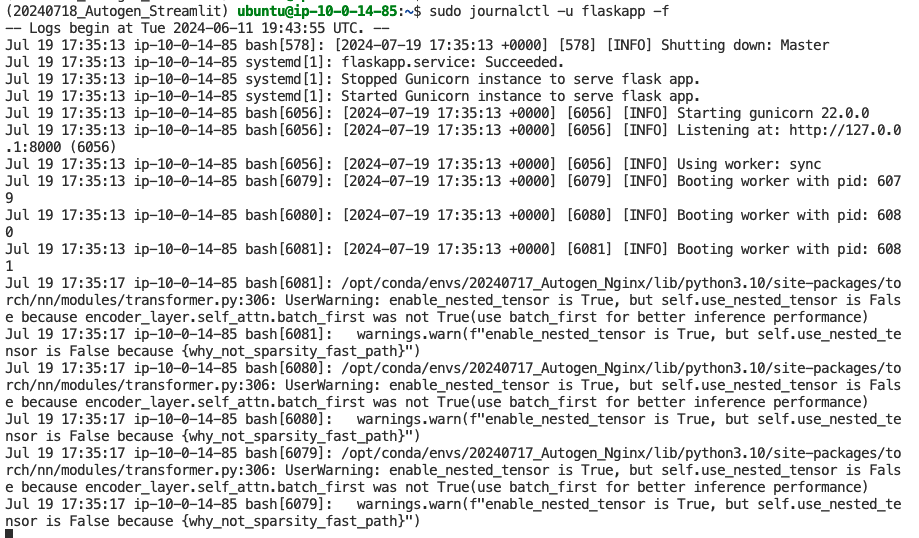

___
### <font color = grey> Step 5. Navigate to the public IP and enter parameters

><font color = blue>2005-11-08 18:50:00
> 
> <font color = blue>2005-12-01 16:50:00
>
> <font color = blue>2005-12-01 16:50:00

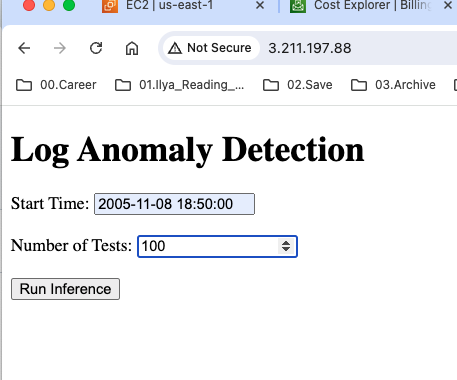

___
### <font color = grey> Step 6. Monitor Flask Logs

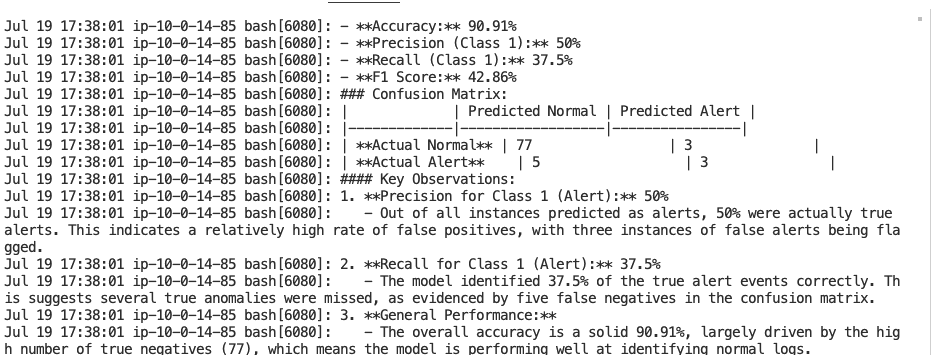

---
### <font color = grey> Step 7. Check URL

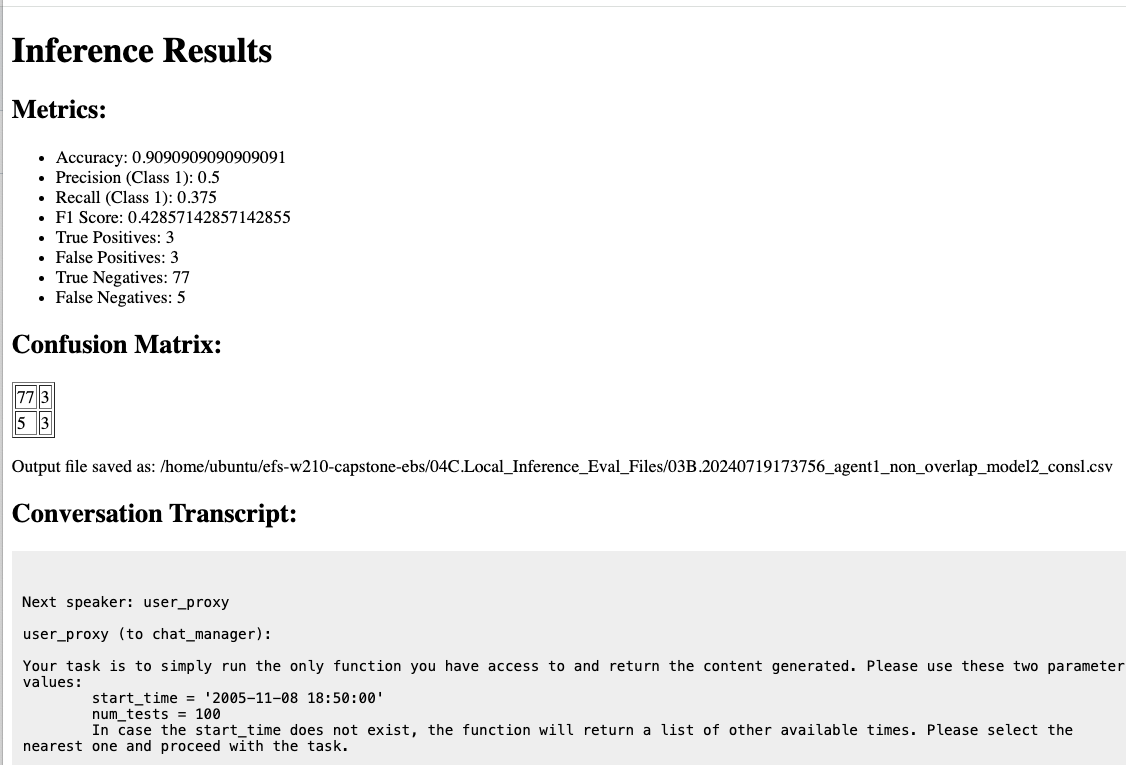

---
### <font color = grey>Step 8. Navigate to main project folder (14..) for Streamlit files
* 20240718_streamlit_app_chatgpt_v1.00_GOLD.py

* 20240718_streamlit_app_claude_v1.00_GOLD.py

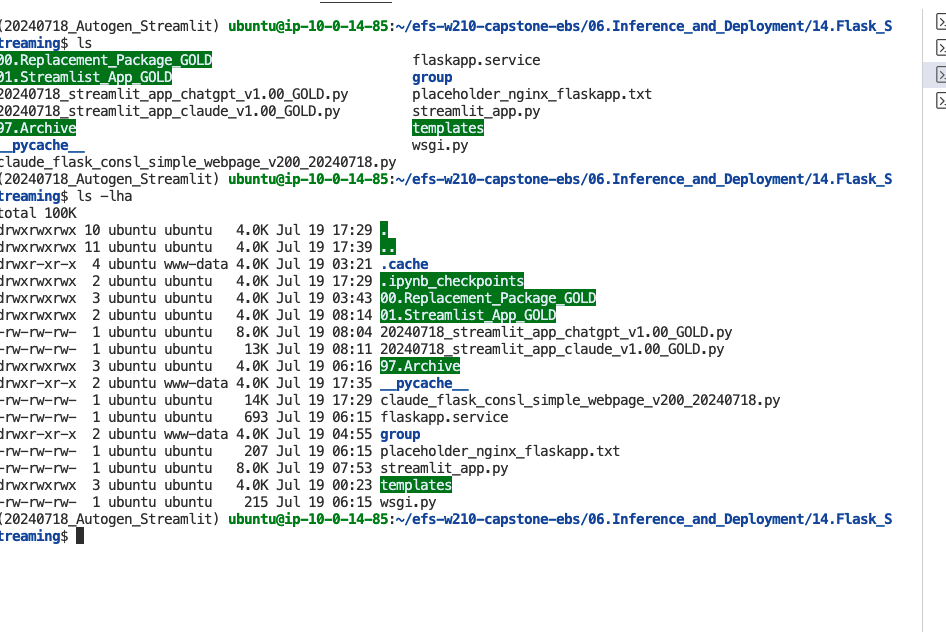

___
### <font color = grey> Step 9. Scan Streamlit files

#### <font color = tomato> ChatGPT Code - Simple

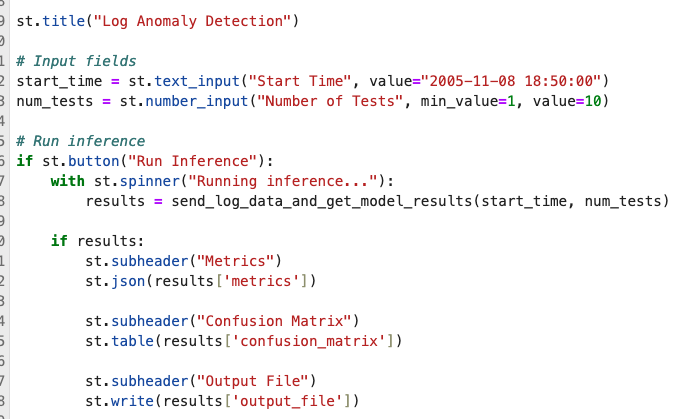

#### <font color = tomato> Claude Code - Detailed (has agents & groups)

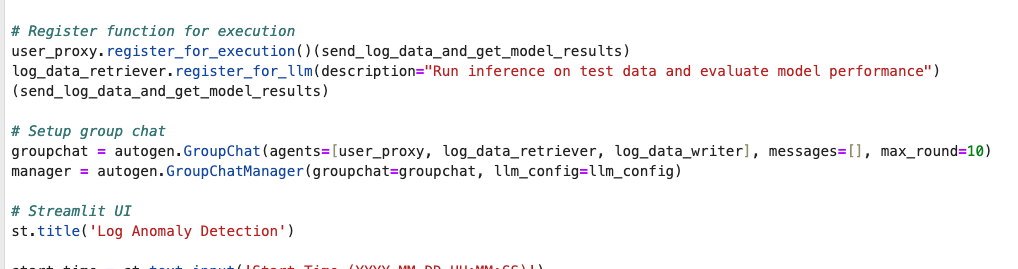


---
### <font color = grey> Step 10. Run Streamlit File
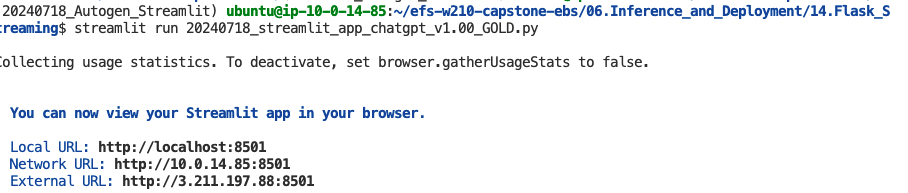

---
### <font color = grey> Step 11. Inference from public IP:5001

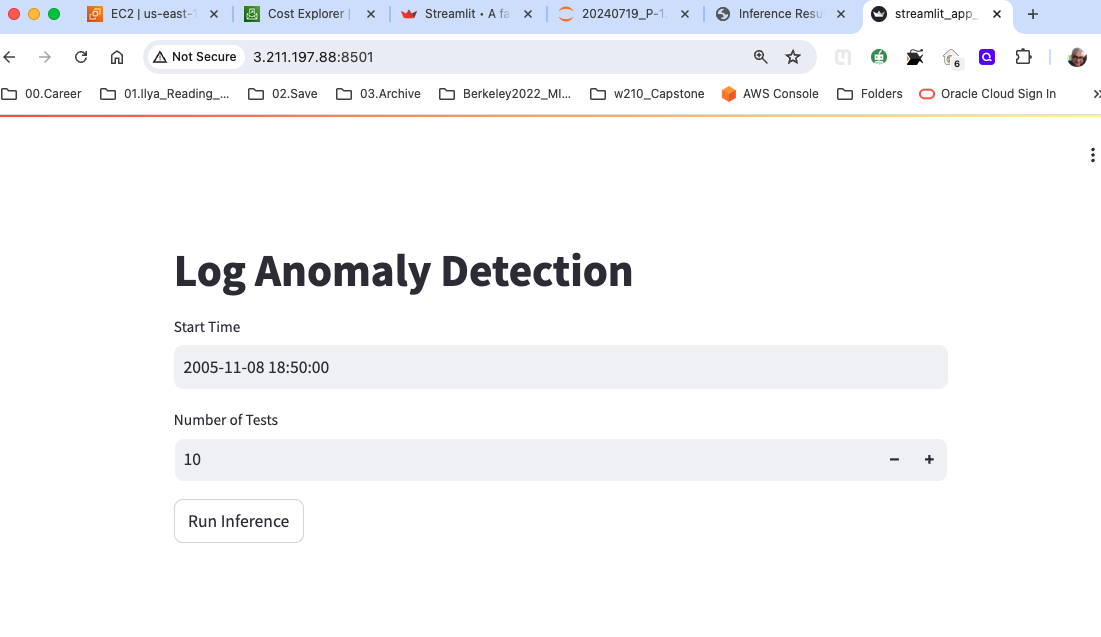

---
#### <font color = blue> (A) ChatGPT - Simple

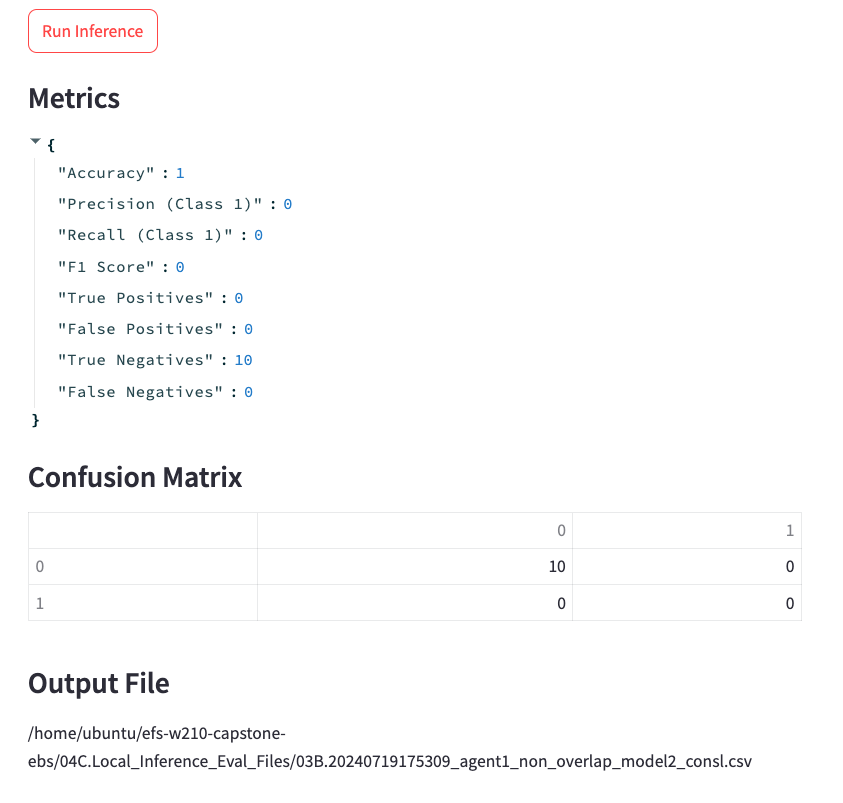

#### <font color = blue> (B) Claude - Detaied (with Agents & Transcript)

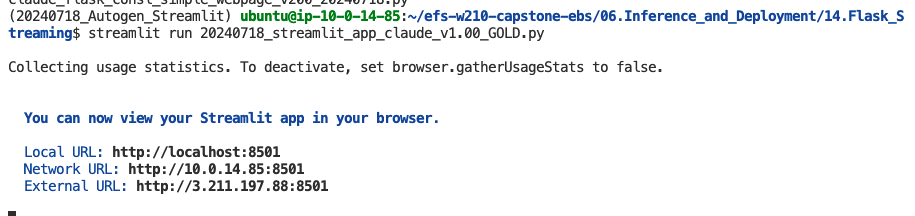

___
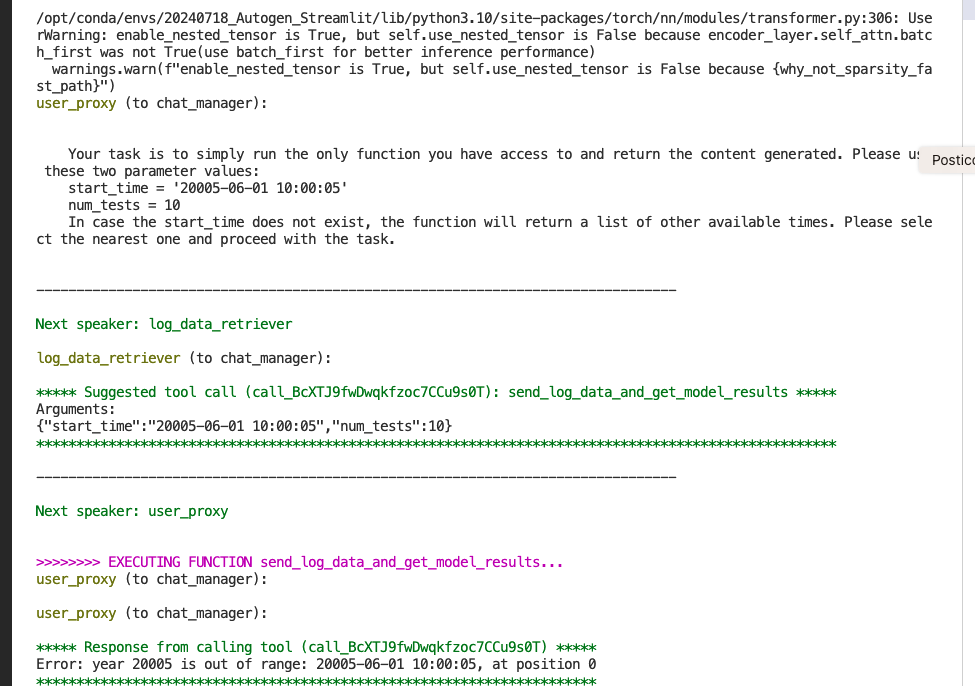

___

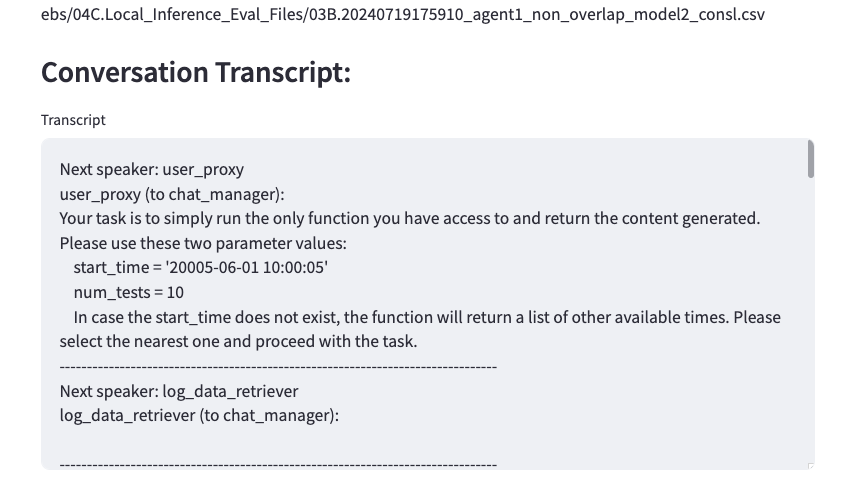

___
# <font color = tomato> Key Concepts

### Nginx: 
> A web server that can also act as a reverse proxy, load balancer, and HTTP cache. It's efficient at handling static content and proxying requests to application servers.
### Reverse Proxy: 
> A server that sits in front of web servers and forwards client requests to those web servers. It provides an additional level of abstraction and control to ensure the smooth flow of network traffic between clients and servers.
### Gunicorn: 
> A Python WSGI HTTP Server for UNIX. It's a pre-fork worker model, which means it can handle multiple requests simultaneously by using multiple worker processes.
### systemd: 
> An init system and system manager that is widely used in Linux distributions to manage system services and resources.
### WSGI: 
> A specification that describes how a web server communicates with web applications. It's a standard interface between web servers and Python web frameworks/applications.

___
# <font color = tomato> Steps

In [2]:
########################## 1. Prepare the Flask Application: ##########################

# Ensure your Flask app is in the correct directory (/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App)
# Rename the main Flask app file to flask_app.py
# We renamed the existing Flask application file to flask_app.py because Python module names cannot start with a number. This was a crucial step to resolve the "ModuleNotFoundError" we encountered earlier.
# The original file name (which started with a date, like "20240718_...") was causing issues when trying to import it as a module.
# Renaming it to flask_app.py not only solved the import issue but also follows a more conventional naming pattern for Flask applications.

# # Flask Application Setup (claude_flask_consl_simple_webpage_v200_20240718.py)
# # Ensure this file contains your main Flask application code
# # Key point: Internal requests use http://127.0.0.1:8000/predict

########################### 2. Create a WSGI file: ##########################

# Create a file named wsgi.py in the same directory as flask_app.py
# Add the following content:

# ---------------------> CODE below <--------------------------

# # WSGI File Setup (wsgi.py)
# import sys
# import os
# sys.path.insert(0, os.path.dirname(__file__))
# from claude_flask_consl_simple_webpage_v200_20240718 import app
# if __name__ == "__main__":
#     app.run()


########################### 3. Set up Gunicorn: ##########################

# Install Gunicorn in your conda environment:

# ---------------------> CODE below <--------------------------

# conda activate 20240717_Autogen_Nginx
# pip install gunicorn


########################### 4. Create a systemd service file for the Flask app: ##########################

# # Create Systemd Service File
# sudo nano /etc/systemd/system/flaskapp.service


# ---------------------> CODE below <--------------------------
# [Unit]
# Description=Gunicorn instance to serve flask app
# After=network.target

# [Service]
# User=ubuntu
# Group=www-data
# WorkingDirectory=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App
# Environment="PATH=/opt/conda/envs/20240717_Autogen_Nginx/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin"
# Environment="PYTHONPATH=/home/ubuntu/efs-w210-capstone-ebs/06.Inference_and_Deployment/12.First_Flask_App"
# ExecStart=/bin/bash -c 'source /opt/conda/etc/profile.d/conda.sh && conda activate 20240717_Autogen_Nginx && exec /opt/conda/envs/20240717_Autogen_Nginx/bin/gunicorn --workers 3 --bind 127.0.0.1:8000 wsgi:app'

# [Install]
# WantedBy=multi-user.target

########################### 5. Start and enable the Flask app service: ##########################

# ---------------------> CODE below <--------------------------
# sudo systemctl start flaskapp
# sudo systemctl enable flaskapp

########################### 6. Install and configure Nginx: ##########################

# Install Nginx: sudo apt install nginx
# Create a new Nginx server block:

# ---------------------> CODE below <--------------------------
# sudo nano /etc/nginx/sites-available/flaskapp

# Add the following content:
# ---------------------> CODE below <--------------------------
# server {
#     listen 80;
#     server_name 3.211.197.88;

#     location / {
#         proxy_pass http://127.0.0.1:8000;
#         proxy_set_header Host $host;
#         proxy_set_header X-Real-IP $remote_addr;
#     }
# }

# Enable the Nginx server block:
# ---------------------> CODE below <--------------------------
# sudo ln -s /etc/nginx/sites-available/flaskapp /etc/nginx/sites-enabled
# sudo nginx -t
# sudo systemctl restart nginx

########################### 7. Start and enable Nginx: ##########################
# ---------------------> CODE below <--------------------------
# sudo systemctl start nginx
# sudo systemctl enable nginx

########################### 8. Configure EC2 Security Group: ##########################

# Open inbound traffic for HTTP (port 80) in your EC2 instance's security group


########################### 9. Restart services: ##########################
# ---------------------> CODE below <--------------------------
# sudo systemctl daemon-reload
# sudo systemctl restart flaskapp
# sudo systemctl restart nginx

########################### 10. Verify the setup: ##########################

# Check the status of both services:
# ---------------------> CODE below <--------------------------
# sudo systemctl status flaskapp
# sudo systemctl status nginx

# Access the application via http://3.211.197.88

########################### 11. Monitoring and Logs ##########################

# ---------------------> CODE below <--------------------------
# # Check Gunicorn logs: sudo journalctl -u flaskapp -f
# # Check Nginx logs: sudo tail -f /var/log/nginx/error.log

___
# <font color = tomato> About Flask, Nginx and Guincorn

**1. Flask Application Setup:**

> File: claude_flask_consl_simple_webpage_v200_20240718.py

>> This file contains your main Flask application code.

>>> Key point: The internal request now uses http://127.0.0.1:8000/predict instead of port 5000.


**2. WSGI File:**

> File: wsgi.py

>> Purpose: Acts as an entry point for the WSGI server (Gunicorn in this case).

>>> It imports your main Flask application and makes it available to Gunicorn.


**3. Gunicorn Setup:**

> Gunicorn is a WSGI HTTP Server for UNIX, designed to serve Python web applications.

>> It's configured to run on port 8000 (http://127.0.0.1:8000).

>>> Gunicorn manages multiple worker processes to handle requests efficiently.


**4. Nginx Configuration:**

> Nginx acts as a reverse proxy, sitting in front of Gunicorn.

>> It listens on port 80 (standard HTTP port) and forwards requests to Gunicorn on port 8000.

>>> This setup allows Nginx to handle static files and SSL termination efficiently.


**5. Systemd Service:**

> A systemd service file is created to manage the Gunicorn process.

>> It ensures that Gunicorn starts automatically on system boot and restarts if it crashes.


**6. Port Usage Explanation:**

> Port 5000: Typically used by Flask's built-in development server. Not used in production.

> Port 8000: Used by Gunicorn to run your Flask app. This is an internal port, not exposed to the internet.

> Port 80: Used by Nginx to receive HTTP requests from the internet.


**7. Why Manual Running is Not Needed:**

> The systemd service automatically starts Gunicorn, which runs your Flask app.

>> Nginx is also running as a service, handling incoming web requests.

>>> This setup allows your application to run continuously without manual intervention.

___
# <font color = tomato> Key Files

### <font color = blue> 4 Files (1 app.py, 1 wsgi.py & 2 html files)

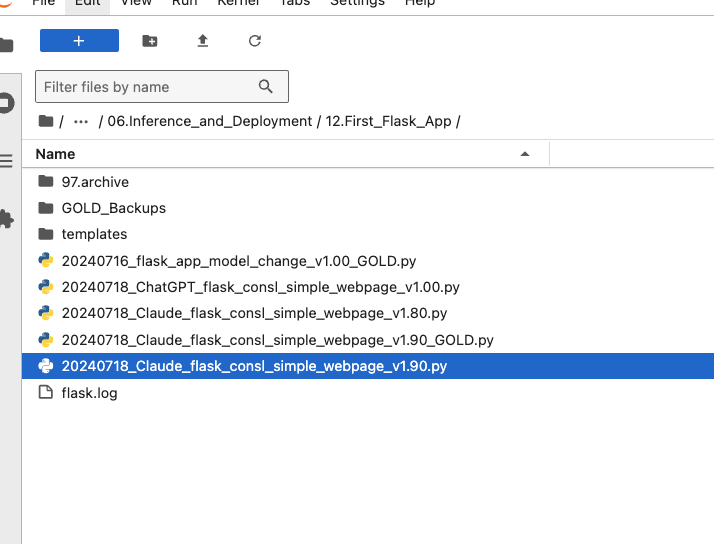

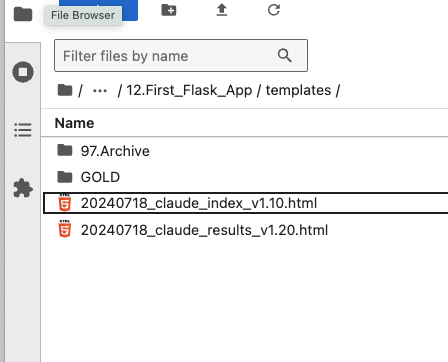

#### <font color = grey>v1.90

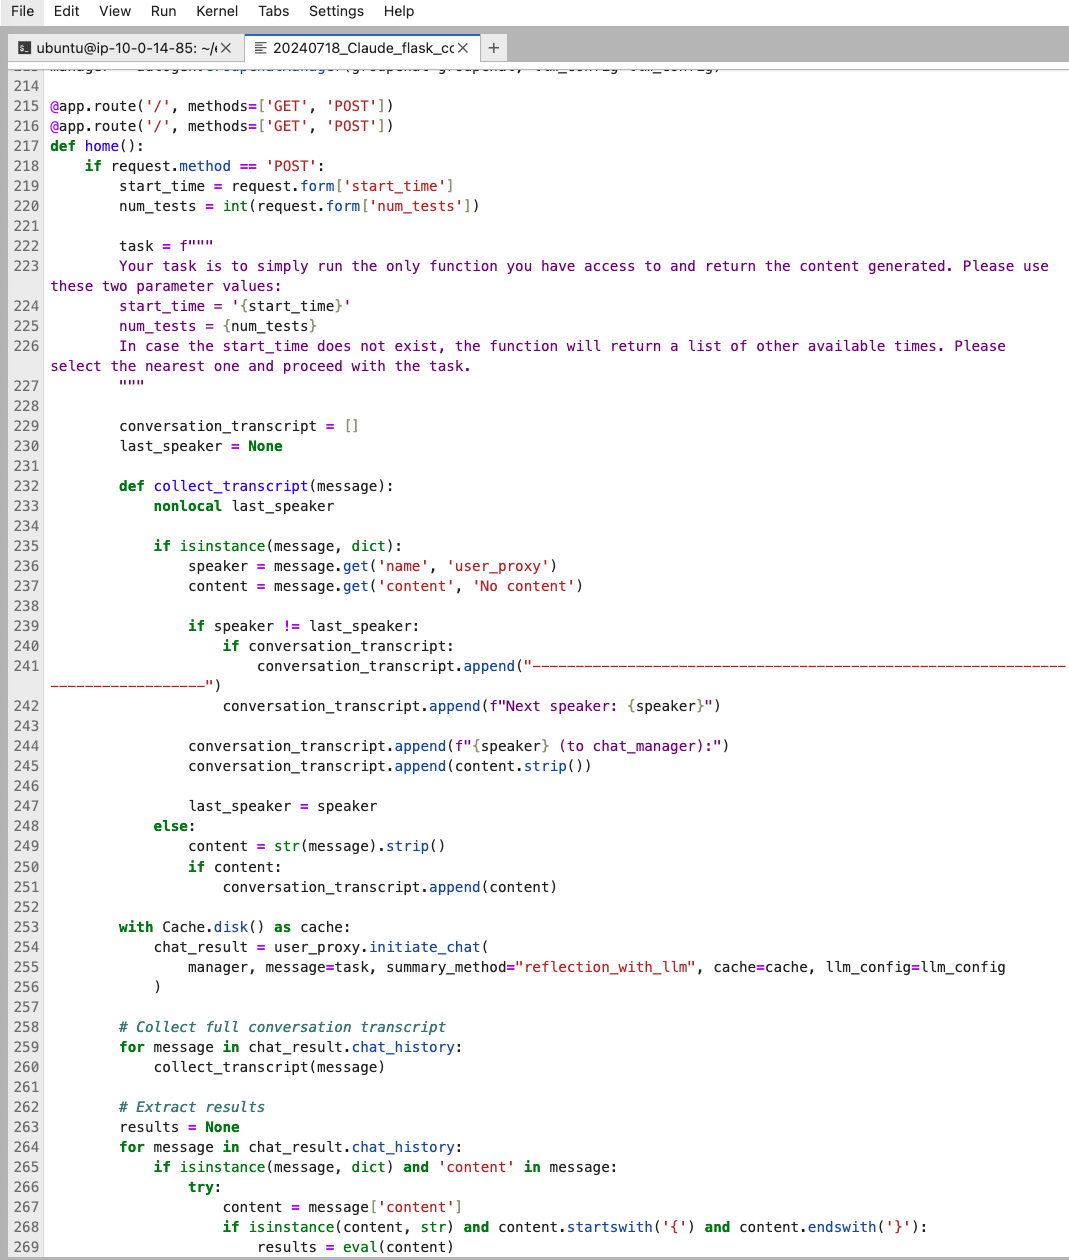

#### wsgi.py

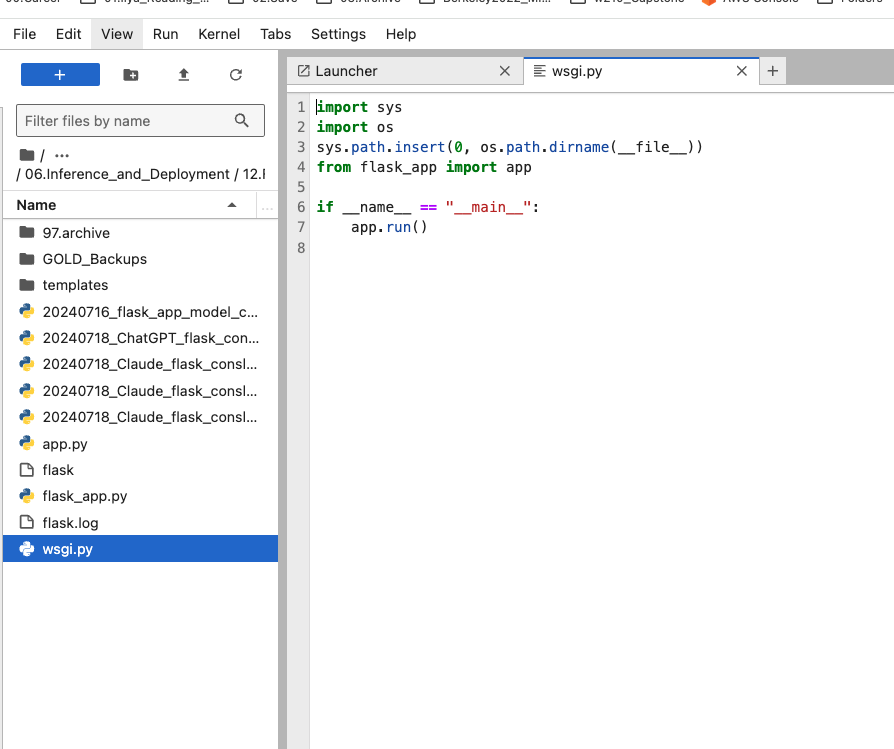

### <font color = grey> Location of Flask Service File

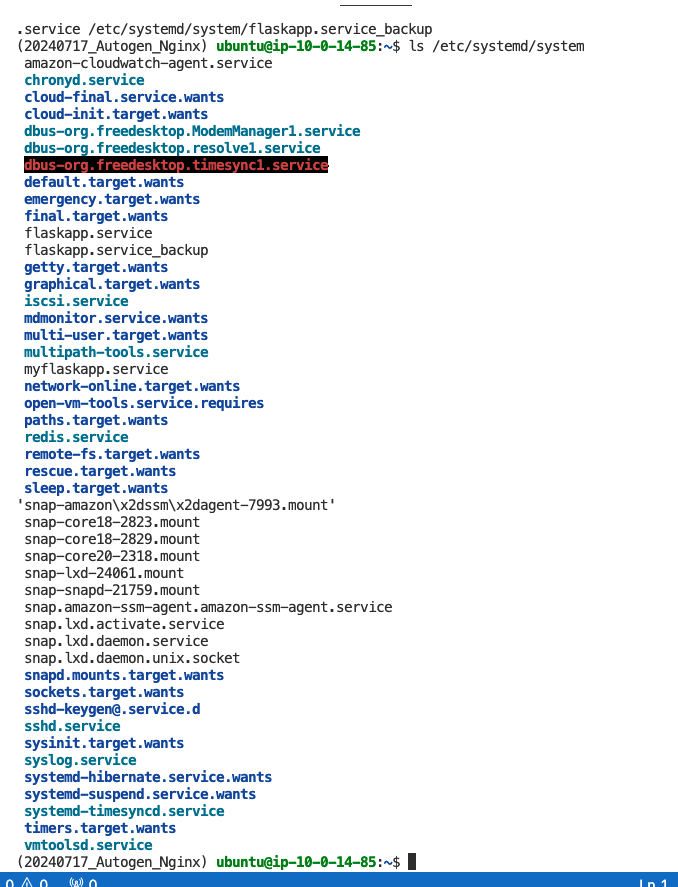

___
# <font color = tomato> Inference --> Use Case 1: Default Parameters (Hardcoded)
### <font color = blue> To move the solution to the public IP of the ec2 vm

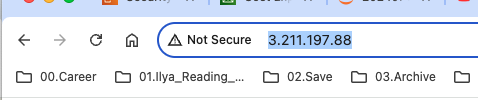

#### index.html
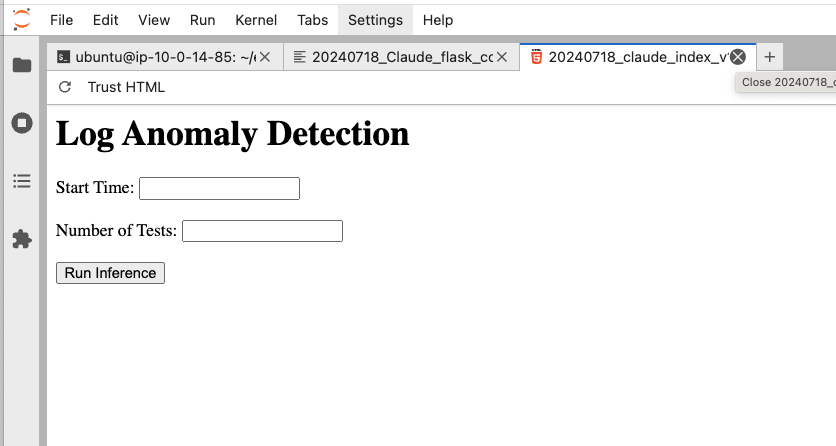

#### results.html
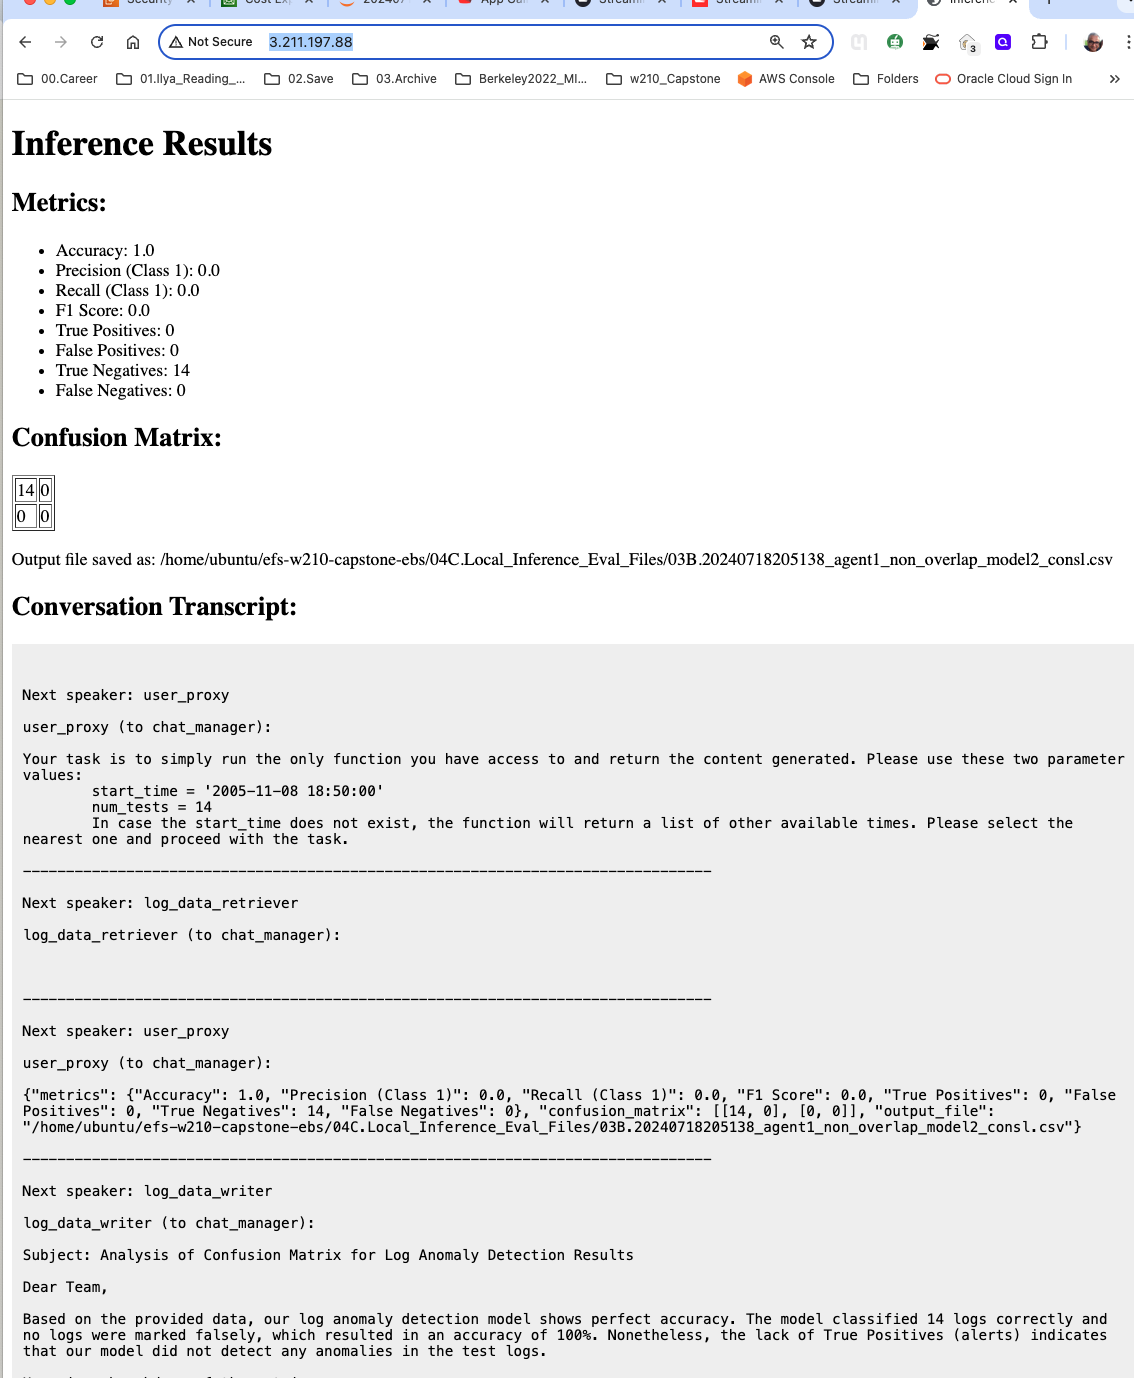

---

### <font color = blue> Check Flask Transcript

##### <font color = tomato> Matches with the results.html output

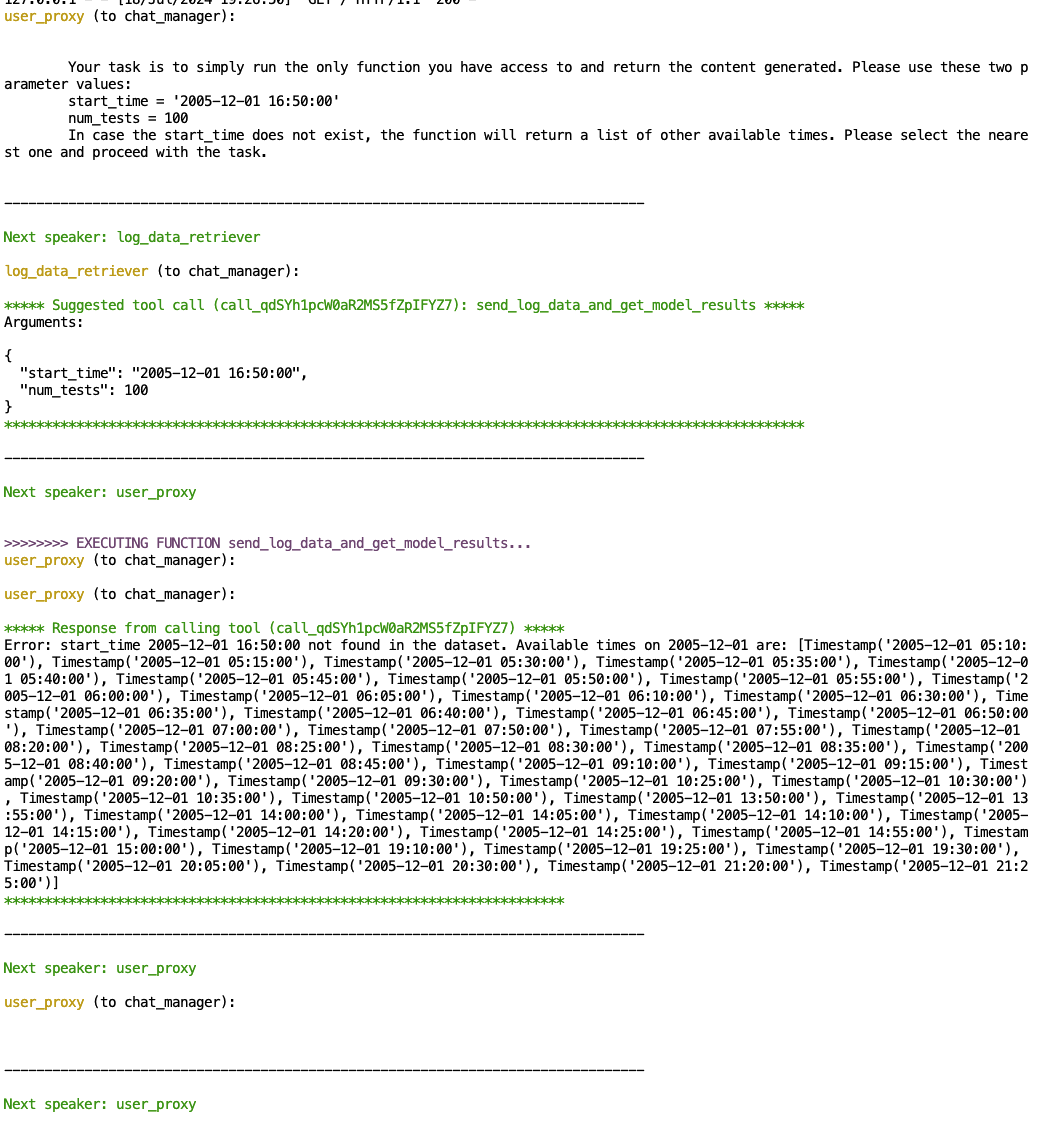

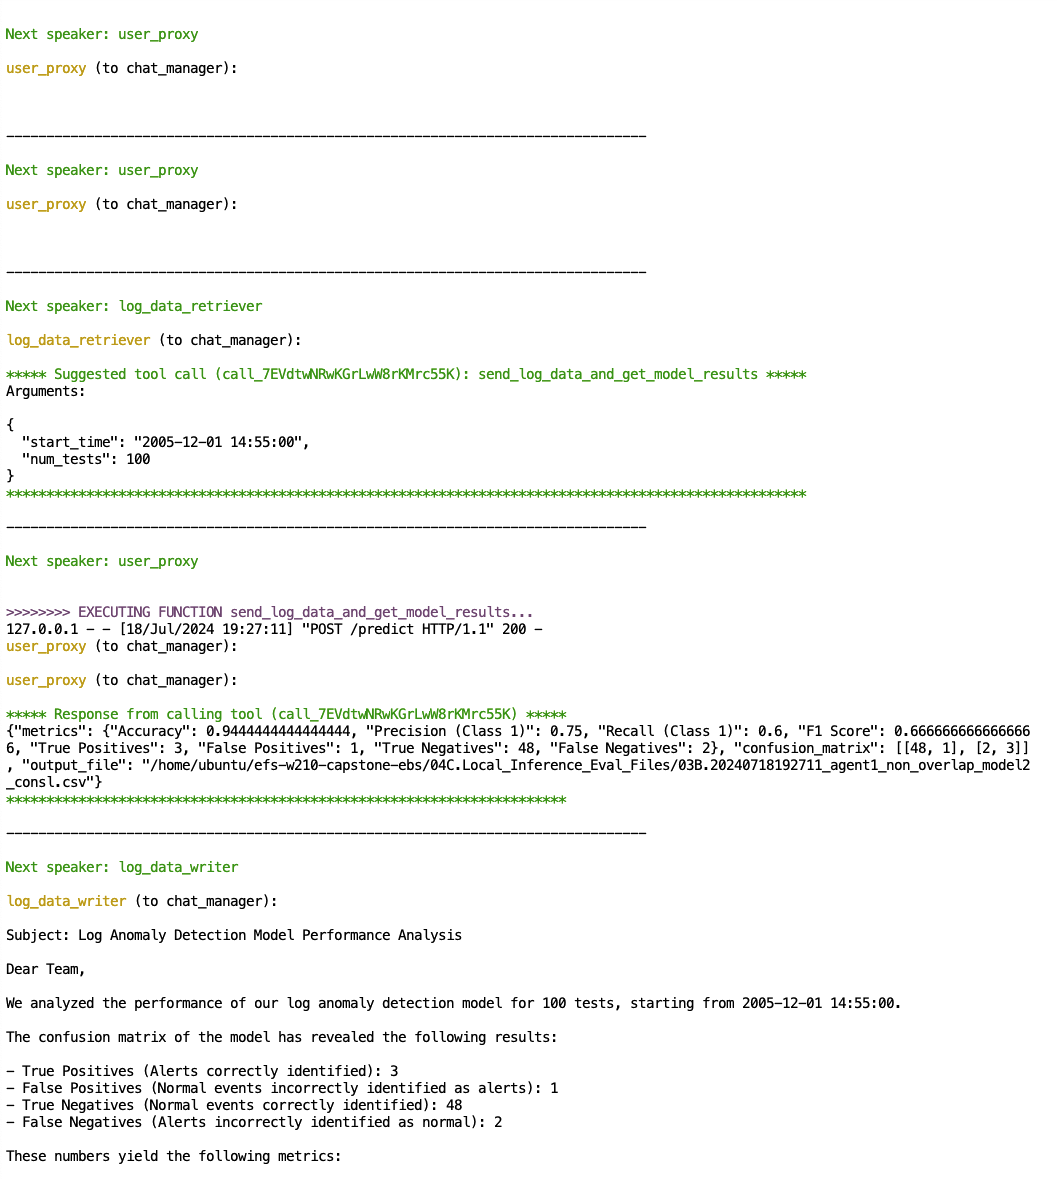

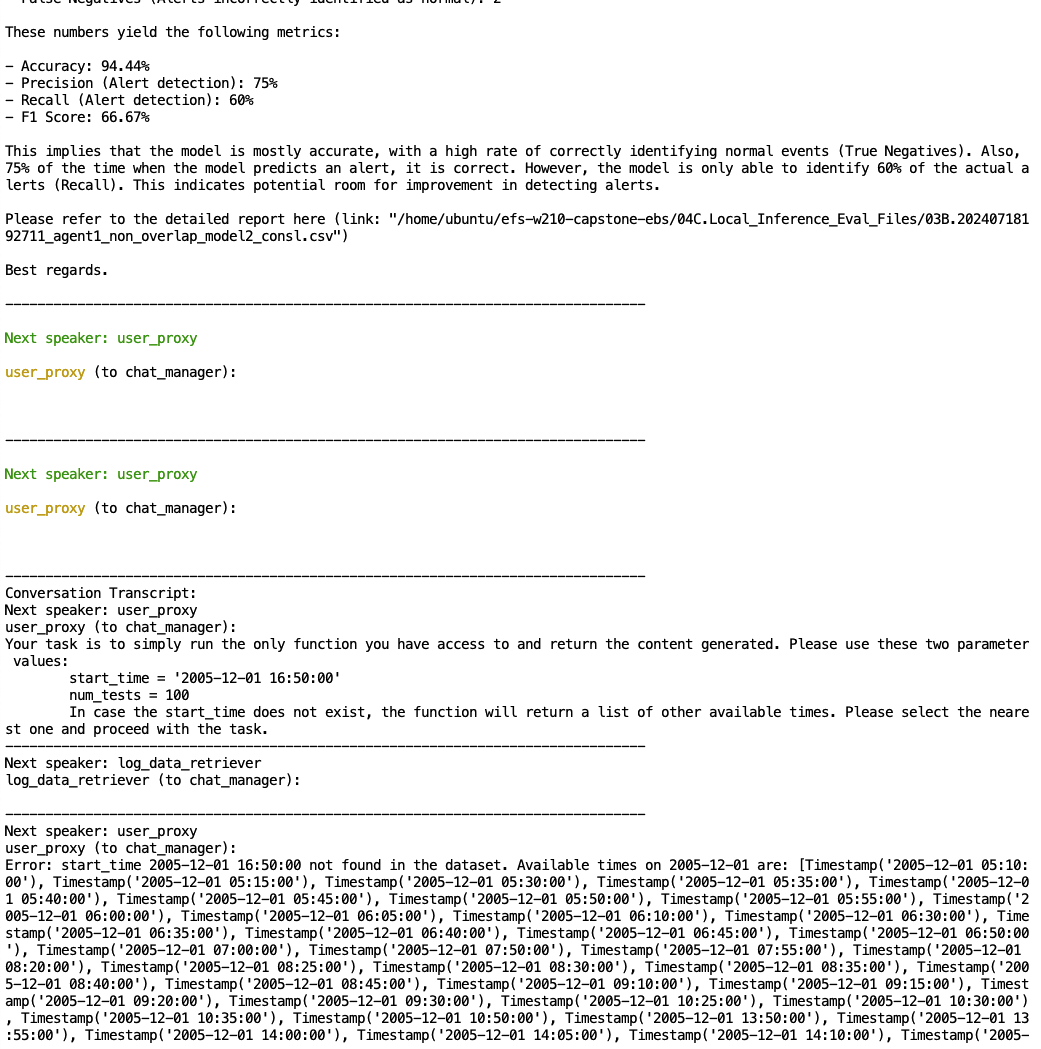